In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/javonne/severity_or_subtype/src")
import functions_data
from dictionaries import highest_subject_id
import functions_abide
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=functions_data.load_pickle(filename="../data/abide_ii/phenotypic_data_asd_all.pkl")
df_autistic=functions_data.load_pickle(filename="../data/abide_ii/phenotypic_data_asd.pkl")
df_allistic=functions_data.load_pickle(filename="../data/abide_ii/phenotypic_data_all.pkl")
df_special=functions_data.load_pickle(filename="../data/abide_ii/phenotypic_data_special.pkl")

In [3]:
df.describe()

,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,SRS_EDITION,SRS_VERSION,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,SRS_MANNERISMS_RAW,CURRENT_MED_STATUS
count,376.000000,376.000000,376.000000,375.000000,360.000000,360.000000,360.000000,332.000000,332.000000,360.000000,360.000000,360.000000,376.000000
mean,1.609043,17.428743,1.188830,111.360000,1.533333,1.327778,48.219444,7.180723,8.096386,15.688889,8.563889,8.236111,0.257979
std,0.488615,12.055044,0.391895,13.397302,0.499582,0.470057,41.467498,4.929459,8.191978,14.626945,7.428870,8.835692,0.438105
min,1.000000,8.013699,1.000000,63.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.045890,1.000000,104.000000,1.000000,1.000000,14.000000,3.000000,1.750000,3.000000,2.000000,1.000000,0.000000
50%,2.000000,11.816438,1.000000,113.000000,2.000000,1.000000,29.500000,6.000000,4.000000,10.000000,7.000000,4.000000,0.000000
75%,2.000000,20.000000,1.000000,120.000000,2.000000,2.000000,81.000000,11.000000,15.000000,27.000000,13.000000,14.000000,1.000000
max,2.000000,64.000000,2.000000,146.000000,2.000000,2.000000,155.000000,20.000000,31.000000,55.000000,29.000000,35.000000,1.000000


In [4]:
# Create some masks
mask_srs_child = df["SRS_VERSION"]==1
mask_srs_adult = df["SRS_VERSION"]==2
mask_asd = df["DX_GROUP"]==1
mask_all = df["DX_GROUP"]==2
mask_older = df["AGE_AT_SCAN "] >= 16
mask_younger = df["AGE_AT_SCAN "] < 16

# mask for nans
nan_counts = df.isna().sum(axis=1)
mask_nan = nan_counts <= 2

In [5]:
for col in df.describe().columns:
    print(f"Autistic average {col} is {df_autistic[col].mean()}\nAllistic average {col} is {df_allistic[col].mean()}\n" )

Autistic average DX_GROUP is 1.0
Allistic average DX_GROUP is 2.0

Autistic average AGE_AT_SCAN  is 19.738126300619047
Allistic average AGE_AT_SCAN  is 15.946301170414849

Autistic average SEX is 1.1020408163265305
Allistic average SEX is 1.244541484716157

Autistic average FIQ is 106.12328767123287
Allistic average FIQ is 114.69868995633188

Autistic average SRS_EDITION is 1.5071428571428571
Allistic average SRS_EDITION is 1.55

Autistic average SRS_VERSION is 1.4785714285714286
Allistic average SRS_VERSION is 1.231818181818182

Autistic average SRS_TOTAL_RAW is 92.30714285714286
Allistic average SRS_TOTAL_RAW is 20.163636363636364

Autistic average SRS_AWARENESS_RAW is 12.419642857142858
Allistic average SRS_AWARENESS_RAW is 4.513636363636364

Autistic average SRS_COGNITION_RAW is 17.741071428571427
Allistic average SRS_COGNITION_RAW is 3.1863636363636365

Autistic average SRS_COMMUNICATION_RAW is 31.114285714285714
Allistic average SRS_COMMUNICATION_RAW is 5.872727272727273

Autisti

In [6]:
ASD_INDECIES = functions_abide.get_dx_indexes(df_with_dx=df)
print(ASD_INDECIES)

[0, 1, 2, 3, 4, 6, 7, 9, 11, 19, 20, 21, 22, 23, 24, 25, 31, 33, 35, 36, 37, 40, 46, 47, 49, 51, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 194, 225, 226, 235, 239, 241, 242, 243, 244, 248, 250, 251, 253, 254, 257, 258, 259, 260, 261, 262, 264, 265, 266, 278, 281, 282, 283, 297, 304, 306, 325, 327, 329, 330, 332, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354]


In [7]:
ASD_INDECIES = functions_abide.get_dx_indexes(df_with_dx=df)
labels = functions_data.load_pickle(filename="../data/abide_ii/most_recent_labels.pkl")
labels = np.array(labels)
harmonised_labels = functions_abide.allign_cluster_label_with_asd_ids(
    asd_indices=ASD_INDECIES,
    labels=labels,
    total_subjects=highest_subject_id
)
harmonised_labels = np.array(harmonised_labels)
df_cluster_labels = pd.DataFrame(harmonised_labels)


In [8]:
df["CLUSTER"]=harmonised_labels

In [9]:
# More masks

mask_cluster_0 = df["CLUSTER"]==0
mask_cluster_1 = df["CLUSTER"]==1

In [10]:
df[mask_asd & mask_younger].describe()

,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,SRS_EDITION,SRS_VERSION,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,SRS_MANNERISMS_RAW,CURRENT_MED_STATUS,CLUSTER
count,72.0,72.000000,72.000000,71.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,72.000000,72.000000
mean,1.0,10.924832,1.208333,105.352113,1.500000,1.029412,95.911765,13.205882,17.205882,32.691176,15.029412,17.779412,0.555556,0.194444
std,0.0,1.945253,0.408966,15.810574,0.503718,0.170214,25.966531,3.564162,5.857917,8.938024,6.452977,6.610362,0.500391,0.398550
min,1.0,8.013699,1.000000,63.000000,1.000000,1.000000,41.000000,4.000000,5.000000,17.000000,0.000000,5.000000,0.000000,0.000000
25%,1.0,9.198630,1.000000,92.500000,1.000000,1.000000,76.000000,11.000000,13.000000,25.000000,11.000000,13.000000,0.000000,0.000000
50%,1.0,10.786301,1.000000,107.000000,1.500000,1.000000,96.000000,13.000000,18.000000,33.500000,14.000000,17.500000,1.000000,0.000000
75%,1.0,12.501027,1.000000,115.500000,2.000000,1.000000,115.250000,16.000000,21.000000,39.250000,20.000000,23.000000,1.000000,0.000000
max,1.0,15.500000,2.000000,139.000000,2.000000,2.000000,155.000000,20.000000,31.000000,51.000000,28.000000,35.000000,1.000000,1.000000


In [11]:
df[mask_asd & mask_older].describe()


,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,SRS_EDITION,SRS_VERSION,SRS_TOTAL_RAW,SRS_AWARENESS_RAW,SRS_COGNITION_RAW,SRS_COMMUNICATION_RAW,SRS_MOTIVATION_RAW,SRS_MANNERISMS_RAW,CURRENT_MED_STATUS,CLUSTER
count,75.0,75.000000,75.0,75.000000,72.000000,72.000000,72.000000,44.000000,44.000000,72.000000,72.000000,72.000000,75.000000,75.000000
mean,1.0,28.198889,1.0,106.853333,1.513889,1.902778,88.902778,11.204545,18.568182,29.625000,15.625000,17.250000,0.333333,0.960000
std,0.0,12.805390,0.0,14.560863,0.503315,0.298339,32.542999,4.278554,6.124285,11.907433,6.985775,6.990436,0.474579,0.197279
min,1.0,17.750000,1.0,73.000000,1.000000,1.000000,11.000000,1.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.000000
25%,1.0,19.250000,1.0,97.500000,1.000000,2.000000,64.250000,9.000000,15.750000,19.750000,11.000000,12.000000,0.000000,1.000000
50%,1.0,22.333333,1.0,107.000000,2.000000,2.000000,89.000000,11.000000,18.000000,30.000000,15.000000,17.000000,0.000000,1.000000
75%,1.0,31.500000,1.0,116.000000,2.000000,2.000000,114.000000,13.250000,21.500000,38.500000,21.000000,23.000000,1.000000,1.000000
max,1.0,62.000000,1.0,146.000000,2.000000,2.000000,152.000000,20.000000,30.000000,55.000000,29.000000,33.000000,1.000000,1.000000


In [12]:
print("Before filtering for only younger subjects:")
print(f"Cluster 0 N = {len(df[mask_cluster_0 & mask_asd])}")
print(f"Cluster 1 N = {len(df[mask_cluster_1 & mask_asd])}")
print("\nAfter filtering for only younger subjects:")
print(f"Cluster 0 N = {len(df[mask_cluster_0 & mask_asd & mask_younger])}")
print(f"Cluster 1 N = {len(df[mask_cluster_1 & mask_asd & mask_younger])}")

Before filtering for only younger subjects:
Cluster 0 N = 61
Cluster 1 N = 86

After filtering for only younger subjects:
Cluster 0 N = 58
Cluster 1 N = 14


In [13]:
print("Before filtering for only younger subjects:")
C0_IQ = np.array(df[mask_cluster_0 & mask_nan]["FIQ"])
C1_IQ = np.array(df[mask_cluster_1 & mask_nan]["FIQ"])
print(f"The mean IQ of cluster 0 is {round(np.nanmean(C0_IQ),2)} ({round(np.std(C0_IQ),2)})")
print(f"The mean IQ of cluster 1 is {round(np.nanmean(C1_IQ),2)} ({round(np.std(C1_IQ),2)})")
print("\nAfter filtering for only younger subjects:")
C0_IQ = np.array(df[mask_cluster_0 & mask_nan & mask_younger]["FIQ"])
C1_IQ = np.array(df[mask_cluster_1 & mask_nan & mask_younger]["FIQ"])
print(f"The mean IQ of cluster 0 is {round(np.nanmean(C0_IQ),2)} ({round(np.std(C0_IQ),2)})")
print(f"The mean IQ of cluster 1 is {round(np.nanmean(C1_IQ),2)} ({round(np.std(C1_IQ),2)})")

Before filtering for only younger subjects:
The mean IQ of cluster 0 is 104.79 (15.28)
The mean IQ of cluster 1 is 107.95 (14.71)

After filtering for only younger subjects:
The mean IQ of cluster 0 is 104.63 (15.64)
The mean IQ of cluster 1 is 112.21 (13.26)


In [14]:
print("Before filtering for only younger subjects:")
C0_AGE = np.array(df[mask_cluster_0 & mask_nan]["AGE_AT_SCAN "])
C1_AGE = np.array(df[mask_cluster_1 & mask_nan]["AGE_AT_SCAN "])
print(f"The mean age of cluster 0 is {round(np.nanmean(C0_AGE),2)} ({round(np.std(C0_AGE),2)})")
print(f"The mean age of cluster 1 is {round(np.nanmean(C1_AGE),2)} ({round(np.std(C1_AGE),2)})")

print("\nAfter filtering for only younger subjects:")
C0_AGE = np.array(df[mask_cluster_0 & mask_nan & mask_younger]["AGE_AT_SCAN "])
C1_AGE = np.array(df[mask_cluster_1 & mask_nan & mask_younger]["AGE_AT_SCAN "])
print(f"The mean age of cluster 0 is {round(np.nanmean(C0_AGE),2)} ({round(np.std(C0_AGE),2)})")
print(f"The mean age of cluster 1 is {round(np.nanmean(C1_AGE),2)} ({round(np.std(C1_AGE),2)})")

Before filtering for only younger subjects:
The mean age of cluster 0 is 10.89 (2.64)
The mean age of cluster 1 is 26.27 (13.27)

After filtering for only younger subjects:
The mean age of cluster 0 is 10.4 (1.63)
The mean age of cluster 1 is 13.05 (1.65)


In [29]:
print("Before filtering for only younger subjects:")
print(f" C0 N = {len(df[mask_cluster_0 & mask_nan])}")
print(f" C1 N = {len(df[mask_cluster_1 & mask_nan])}")
print(f"ALL N = {len(df[mask_all & mask_nan])}")
print("\nAfter filtering for only younger subjects:")
print(f" C0 N = {len(df[mask_cluster_0 & mask_nan & mask_younger])}")
print(f" C1 N = {len(df[mask_cluster_1 & mask_nan & mask_younger])}")
print(f"ALL N = {len(df[mask_all & mask_nan & mask_younger])}")


Before filtering for only younger subjects:
 C0 N = 57
 C1 N = 83
ALL N = 220

After filtering for only younger subjects:
 C0 N = 54
 C1 N = 14
ALL N = 161


In [30]:
meta_cols=["SITE_ID","DX_GROUP","AGE_AT_SCAN ","SRS_EDITION", "SRS_VERSION", "SEX", "CLUSTER"]
meta_cols=["SITE_ID","DX_GROUP","SRS_EDITION", "SRS_VERSION", "SEX", "CLUSTER"]

for col in df.drop(meta_cols,axis=1).columns:

    # Get means and std's
    C0_TRAIT = np.array(df[mask_cluster_0 & mask_nan & mask_younger][col])
    C1_TRAIT = np.array(df[mask_cluster_1 & mask_nan & mask_younger][col])
    ALL_TRAIT = np.array(df[mask_all & mask_nan & mask_younger][col])
    print(f"The mean {col} of cluster 0 is {round(np.nanmean(C0_TRAIT),2)} ({round(np.std(C0_TRAIT[~np.isnan(C0_TRAIT)]),2)})")
    print(f"The mean {col} of cluster 1 is {round(np.nanmean(C1_TRAIT),2)} ({round(np.std(C1_TRAIT[~np.isnan(C1_TRAIT)]),2)})")
    print(f"The mean {col} of Allistic subjects is {round(np.nanmean(ALL_TRAIT),2)} ({round(np.std(ALL_TRAIT),2)})")

    # Check for significance
    _, p_value_intercluster = stats.ttest_ind(C0_TRAIT[~np.isnan(C0_TRAIT)], C1_TRAIT[~np.isnan(C1_TRAIT)])
    _, p_value_ALL_C0 = stats.ttest_ind(ALL_TRAIT[~np.isnan(ALL_TRAIT)], C0_TRAIT[~np.isnan(C0_TRAIT)])
    _, p_value_ALL_C1 = stats.ttest_ind(ALL_TRAIT[~np.isnan(ALL_TRAIT)], C1_TRAIT[~np.isnan(C1_TRAIT)])
    
    if p_value_ALL_C1 < 0.05:
        print(f"Difference between ALL and C0 is statistically significant for {col} {round(p_value_ALL_C0,5)}")
    else:
        print(f"Difference between ALL and C0 is NOT statistically significant for {col} {round(p_value_ALL_C0,5)}")


    if p_value_ALL_C1 < 0.05:
        print(f"Difference between ALL and C1 is statistically significant for {col} {round(p_value_ALL_C1,5)}")
    else:
        print(f"Difference between ALL and C1 is NOT statistically significant for {col} {round(p_value_ALL_C1,5)}")

    if p_value_intercluster < 0.05:
        print(f"Difference between C0 and C1 is statistically significant for {col} {round(p_value_intercluster,5)}")
    else:
        print(f"Difference between C0 and C1 is NOT statistically significant for {col} {round(p_value_intercluster,5)}")


    print()

The mean AGE_AT_SCAN  of cluster 0 is 10.4 (1.63)
The mean AGE_AT_SCAN  of cluster 1 is 13.05 (1.65)
The mean AGE_AT_SCAN  of Allistic subjects is 10.58 (1.47)
Difference between ALL and C0 is statistically significant for AGE_AT_SCAN  0.4559
Difference between ALL and C1 is statistically significant for AGE_AT_SCAN  0.0
Difference between C0 and C1 is statistically significant for AGE_AT_SCAN  0.0

The mean FIQ of cluster 0 is 104.63 (15.64)
The mean FIQ of cluster 1 is 112.21 (13.26)
The mean FIQ of Allistic subjects is 114.73 (11.14)
Difference between ALL and C0 is NOT statistically significant for FIQ 0.0
Difference between ALL and C1 is NOT statistically significant for FIQ 0.42864
Difference between C0 and C1 is NOT statistically significant for FIQ 0.10544

The mean SRS_TOTAL_RAW of cluster 0 is 96.0 (26.1)
The mean SRS_TOTAL_RAW of cluster 1 is 95.57 (24.49)
The mean SRS_TOTAL_RAW of Allistic subjects is 17.59 (12.68)
Difference between ALL and C0 is statistically significant 

/tmp/ipykernel_629569/2821121352.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  functions_abide.scatter_plot([df_autistic[mask_nan]["SRS_TOTAL_RAW"], df_autistic[mask_nan]["AGE_AT_SCAN "]], "Age x Severity")
/tmp/ipykernel_629569/2821121352.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  functions_abide.scatter_plot([df_autistic[mask_nan]["SRS_TOTAL_RAW"], df_autistic[mask_nan]["AGE_AT_SCAN "]], "Age x Severity")


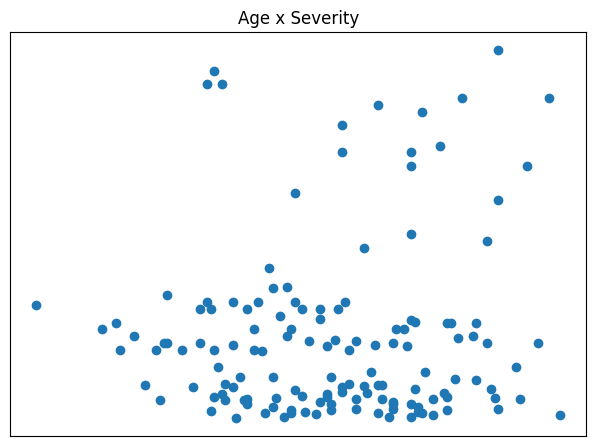

In [32]:
functions_abide.scatter_plot([df_autistic[mask_nan]["SRS_TOTAL_RAW"], df_autistic[mask_nan]["AGE_AT_SCAN "]], "Age x Severity")



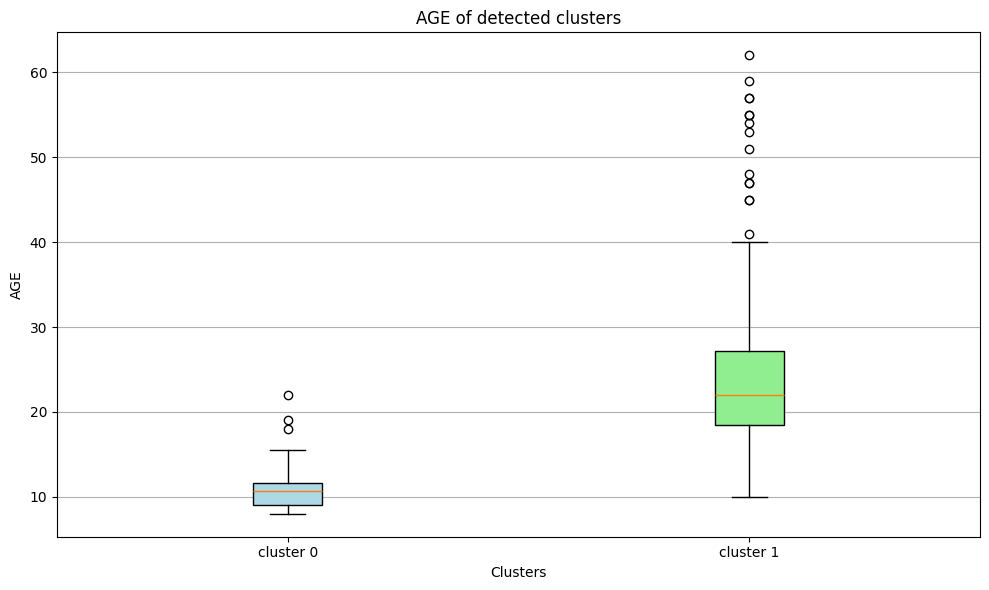

In [16]:
functions_abide.create_boxplot(
    data=[df[mask_cluster_0 & mask_nan]["AGE_AT_SCAN "], df[mask_cluster_1 & mask_nan]["AGE_AT_SCAN "]], 
    trait_name="AGE")

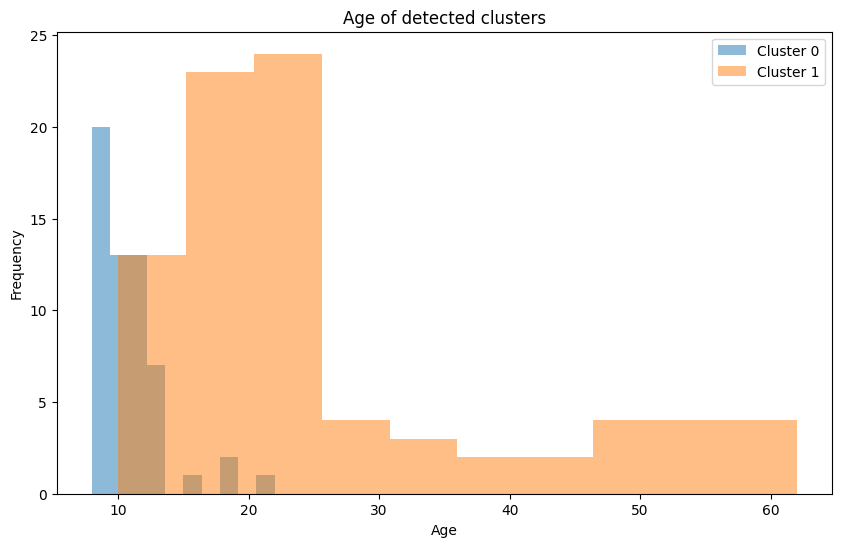

In [17]:
functions_abide.plot_histogram(
    [df[mask_cluster_0 & mask_nan]["AGE_AT_SCAN "], df[mask_cluster_1 & mask_nan]["AGE_AT_SCAN "]], 
    "Age")